In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df[ 'job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [3]:
import ast
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [4]:
df[['job_title_short', 'job_skills']].head(5)

,job_title_short,job_skills
0,Senior Data Engineer,None
1,Data Analyst,"[r, python, sql, nosql, power bi, tableau]"
2,Data Engineer,"[python, sql, c#, azure, airflow, dax, docker,..."
3,Data Engineer,"[python, c++, java, matlab, aws, tensorflow, k..."
4,Data Engineer,"[bash, python, oracle, aws, ansible, puppet, j..."


In [5]:
df_exploded = df.explode('job_skills')
df_exploded['job_skills']

0               None
1                  r
1             python
1                sql
1              nosql
             ...    
785739         kafka
785739    kubernetes
785739        docker
785740           aws
785740          flow
Name: job_skills, Length: 3777320, dtype: object

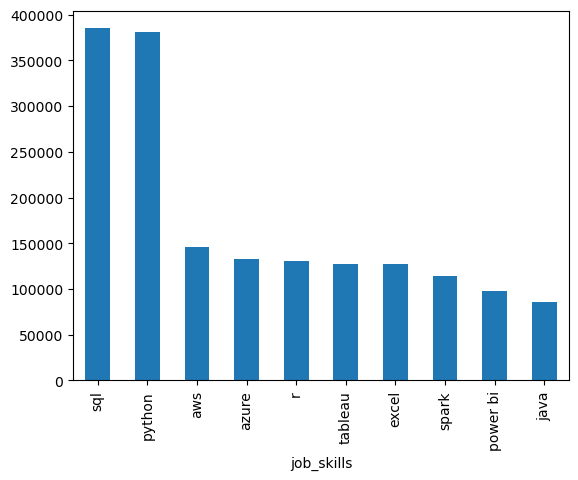

In [6]:
df_exploded['job_skills'].value_counts().head(10).plot(kind='bar')
plt.show()

In [9]:

skills_count = df_exploded.groupby(['job_skills', 'job_title_short']).size()

print('Type of skills_count: ', type(skills_count))
skills_count

Type of skills_count:  <class 'pandas.core.series.Series'>


job_skills  job_title_short          
airflow     Business Analyst               318
            Cloud Engineer                 260
            Data Analyst                  2002
            Data Engineer                25505
            Data Scientist                3915
                                         ...  
zoom        Machine Learning Engineer       46
            Senior Data Analyst             86
            Senior Data Engineer           122
            Senior Data Scientist           79
            Software Engineer              229
Length: 2256, dtype: int64

In [10]:
df_skills_count = skills_count.reset_index(name='skill_count') # we need to rename the main Series value to count

df_skills_count

,job_skills,job_title_short,skill_count
0,airflow,Business Analyst,318
1,airflow,Cloud Engineer,260
2,airflow,Data Analyst,2002
3,airflow,Data Engineer,25505
4,airflow,Data Scientist,3915
...,...,...,...
2251,zoom,Machine Learning Engineer,46
2252,zoom,Senior Data Analyst,86
2253,zoom,Senior Data Engineer,122
2254,zoom,Senior Data Scientist,79


In [12]:
df_skills_count.sort_values(by='skill_count',  ascending=False)

df_skills_count

,job_skills,job_title_short,skill_count
1915,symfony,Senior Data Analyst,1
356,couchdb,Senior Data Analyst,1
1128,msaccess,Data Analyst,1
401,datarobot,Cloud Engineer,1
1093,monday.com,Machine Learning Engineer,1
...,...,...,...
1823,sql,Data Scientist,78982
1821,sql,Data Analyst,92428
1479,python,Data Engineer,108022
1822,sql,Data Engineer,113130


In [13]:
job_title = 'Data Analyst'
head_value = 10

df_skill_final = df_skills_count[df_skills_count['job_title_short'] == job_title].head(head_value)

df_skill_final

,job_skills,job_title_short,skill_count
1128,msaccess,Data Analyst,1
554,esquisse,Data Analyst,1
1256,nuxt.js,Data Analyst,1
227,capacitor,Data Analyst,1
252,chainer,Data Analyst,1
1878,suse,Data Analyst,1
1317,ovh,Data Analyst,1
771,gtx,Data Analyst,1
1052,mattermost,Data Analyst,2
41,angular.js,Data Analyst,2


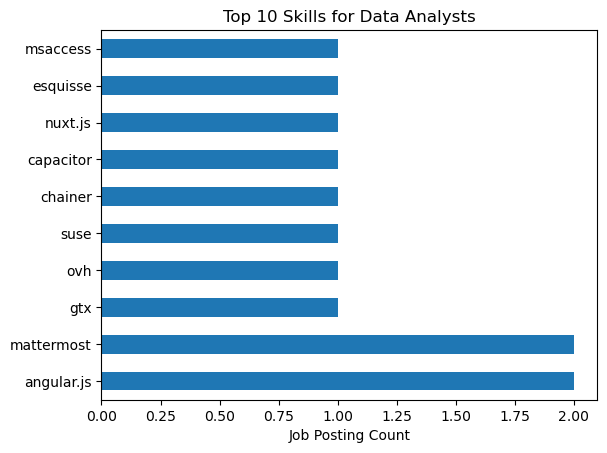

In [14]:
df_skill_final.plot(kind='barh', x='job_skills', y='skill_count')
plt.xlabel('Job Posting Count')
plt.ylabel('')
plt.title(f'Top {head_value} Skills for {job_title}s')
plt.gca().invert_yaxis()  # To display the highest value on top
plt.legend().set_visible(False)
plt.show()